# Airport

<div style="border: 3px solid black;padding: 15px;">
    <div style="font-size:20px; font-weight:bold; margin-bottom:7px;">Задача</div>
    <div>Дана база пассажиропотока в некотором аэропорту “Сайнс” с января 2007 г. по 2018 гг. в файле Science.csv

Необходимо написать модель для предсказания пассажиропотока и предсказать пассажиропоток в последующие 12 месяцев. Ответ выведите в формате JSON.
        
Ссылка на первоисточник: https://open-data-battle.geecko.com/issues/airport</div>
</div>

Статьи\источники для ознакомления с анализом временных рядов и благодаря которым была сделана задача:

[1 Time Series Analysis](https://medium.com/swlh/time-series-analysis-7006ea1c3326) +

[2 Time series-Introduction](https://towardsdatascience.com/time-series-introduction-7484bc25739a) +

[3 Анализ временных рядов с помощью Python](https://habr.com/ru/company/ods/blog/327242/) +

[4 Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/) ++ (real good)

[5 ARIMA Model – Complete Guide to Time Series Forecasting in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)  +++ awesome

[6 Tutorial: Time Series Analysis with Pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)

[7 Прогнозирование временных рядов с помощью ARIMA в Python 3](https://www.8host.com/blog/prognozirovanie-vremennyx-ryadov-s-pomoshhyu-arima-v-python-3/)

[8 End-to-End Time Series Analysis and Forecasting: a Trio of SARIMAX, LSTM and Prophet (Part 1)](https://towardsdatascience.com/end-to-end-time-series-analysis-and-forecasting-a-trio-of-sarimax-lstm-and-prophet-part-1-306367e57db8) ++

[9 Нежное введение в SARIMA для прогнозирования временных рядов в Python](https://www.machinelearningmastery.ru/sarima-for-time-series-forecasting-in-python/) +

[10 Time Series Forecasting Using a Seasonal ARIMA Model: A Python Tutorial ](https://techrando.com/2020/01/04/time-series-forecasting-using-a-seasonal-arima-model/) +

[11 Kaggle: Time-series forecasting with SARIMAX](https://www.kaggle.com/omgl93/time-series-forecasting-with-sarimax) +

[12 Tensorflow: Time series forecasting](https://www.tensorflow.org/tutorials/structured_data/time_series?hl=nl)

# Немного теории

**Стационарный ряд** - это ряд, в котором значения ряда не зависят от времени.

**Почему важна стационарность?** Стационарный ряд относительно легко предсказать: вы просто прогнозируете, что его статистические свойства будут такими же в будущем, как и в прошлом. Таким образом, большинство статистических методов прогнозирования основаны на предположении, что временные ряды приблизительно стационарны.

**Критерии стационарности:**
+ Среднее значение ряда не должно быть функцией времени, а должно быть константой. 
+ Дисперсия ряда не должна зависеть от времени. 
+ Ковариация i-го члена и (i + m) -го члена не должна быть функцией времени. 

![Примеры нестационарности](img/stationarity.png)

**Компоненты нестационарного временного ряда:**
+ *Уровень* - базовое значение для ряда, если он был прямой линией; 
+ *Тренд* - тенденция данных к увеличению или уменьшению в течение длительного периода времени;
+ *Цикличность* - если колебания НЕ имеют фиксированных календарных частот; 
+ *Сезонность* - если пики и спады ряда происходят через равные промежутки времени;
+ *Шум (Остатки)* - случайные флуктуации

**Модели нестационарного ряда:**
+ *Аддитивная*  $$Y_t = Level+Trend+Seasonality+Cycle+Resid$$

+ *Мультипликативная*  $$Y_t = Level*Trend*Seasonality*Cycle*Resid$$


**Способы сделать ряд стационарным:**
+ Дифференцирование (один раз или больше) - вычитание двух соседних значений ряда
+ Логарифмирование
+ Взятие корня

**Методы проверки стационарности ряда:**
+ Визуально посмотреть на график
+ Статистический тест *Дики Фуллера*

****Этапы построения модели временных рядов для прогнозирования:****
1. Обеспечение стационарности данных;
2. Выбор правильной модели;
3. Оценка точности модели.

**Модели прогнозирования:**
+ ⭐❌❌ Линейная регрессия - может использоваться как базовая модель
+ ⭐⭐❌ Семейство *ARIMA*  
+ ⭐⭐⭐ Нейросеть *LSTM*        

**Семейство ARIMA:**

*AR* - модель авторегресии, прогнозирует переменную, используя линейную комбинацию ее предыдущих значений

*MA* - модель скользящего среднего, представляет собой линейную комбинацию предыдущих членов ошибки. 

*I* - член интегрирования

![Этапы моделироания ARIMA](img/steps_of_modeling.png)

**SARIMAX** - **S**easonal **A**uto-**R**egressive **I**ntegrated **M**oving **A**verage with e**X**ogenous factors

*S* - сезонность

$$SARIMA  (p, d, q)*(P, D, Q, S)$$

Суть методов *SARIMA* - определить коэффициенты (p, d, q, P, D, Q, S). Можно вручную по графикам *ACF* и *PACF*, а можно используя перебор всех возможных значений, так как в основном значения коээфициентов (кроме сезонности) лежат в диапазоне (0 - 2)

*p* = несезонный порядок авторегрессии (AR)

*d* = несезонная разность (I)

*q* = порядок несезонной скользящей средней (MA)

*P* = сезонный порядок (AR)

*D* = cезонная разность (I)

*Q* = сезонный порядок (MA)

*S* = длина повторяющегося сезонного паттерна

**Нужна ли стационарность для SARIMAX?** Не совсем. В Statsmodels SARIMAX по умолчанию включена опция, обеспечивающая стационарность. Однако это отличный инструмент для анализа данных, и его следует использовать.



# 1. Разведочный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
rcParams['figure.figsize'] = 12, 7

In [7]:
df = pd.read_csv('Data/Science.csv')
df.head()

,Passengers,Year,Month
0,1235.75,2007,4
1,1487.53,2007,3
2,1563.96,2007,7
3,1575.27,2007,0
4,1762.00,2007,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  145 non-null    float64
 1   Year        157 non-null    int64  
 2   Month       157 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.8 KB


Имеются 12 пропусков в колоке Passengers

In [9]:
df['Month'].unique()

array([ 4,  3,  7,  0,  8,  6,  5,  1, 11, 10,  9,  2], dtype=int64)

Заменим месяц 0 на 12. Этого требует метод `pd.to_datetime`

In [10]:
df['Month'] = df['Month'].apply(lambda x: x if x != 0 else 12)

Для создания колоки даты требуется день. Создадим колоку день со значением 1

In [11]:
df['Day'] = 1

Создадим колоку даты

In [12]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [13]:
df.head(3)

,Passengers,Year,Month,Day,Date
0,1235.75,2007,4,1,2007-04-01
1,1487.53,2007,3,1,2007-03-01
2,1563.96,2007,7,1,2007-07-01


<AxesSubplot:xlabel='Date'>

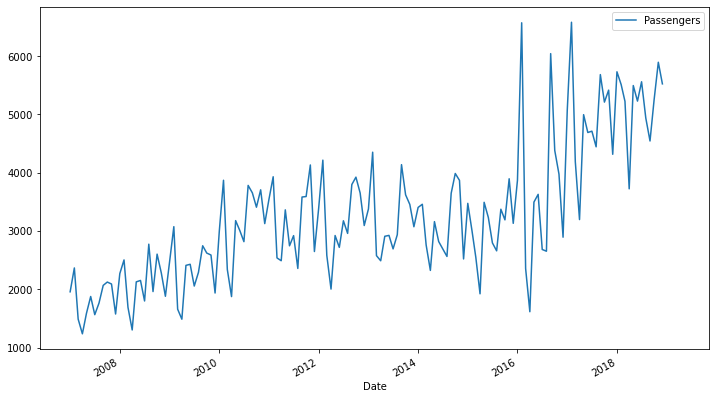

In [14]:
df.plot(x='Date', y='Passengers')

Установим дату как индекс и отсортируем значения

In [15]:
df = df.set_index('Date').sort_index()

In [16]:
df.tail(14)

,Passengers,Year,Month,Day
Date,,,,
2018-12-01,5522.41,2018,12,1
2019-01-01,NaN,2019,1,1
2019-02-01,NaN,2019,2,1
2019-03-01,NaN,2019,3,1
2019-04-01,2876.41,2019,4,1
2019-05-01,NaN,2019,5,1
2019-06-01,NaN,2019,6,1
2019-07-01,NaN,2019,7,1
2019-08-01,NaN,2019,8,1


По условию задачи даны наблюдения по 2018 год. В таблице видим так же одно наблюдение за апрель 2019 года

Сформируем тренировочный датасет

In [17]:
df_train = df[~df['Passengers'].isna()]

Удалим из тренировочных данных последнее значение (апрель 2019)

In [18]:
df_train = df_train.iloc[:-1,:]

In [19]:
df_train.tail(3)

,Passengers,Year,Month,Day
Date,,,,
2018-10-01,5247.11,2018,10,1
2018-11-01,5893.07,2018,11,1
2018-12-01,5522.41,2018,12,1


# 2. Анализ временного ряда

## Тренд

In [20]:
passengers = df_train['Passengers']

[Установка тиков по оси x такими какими захочешь](https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator)

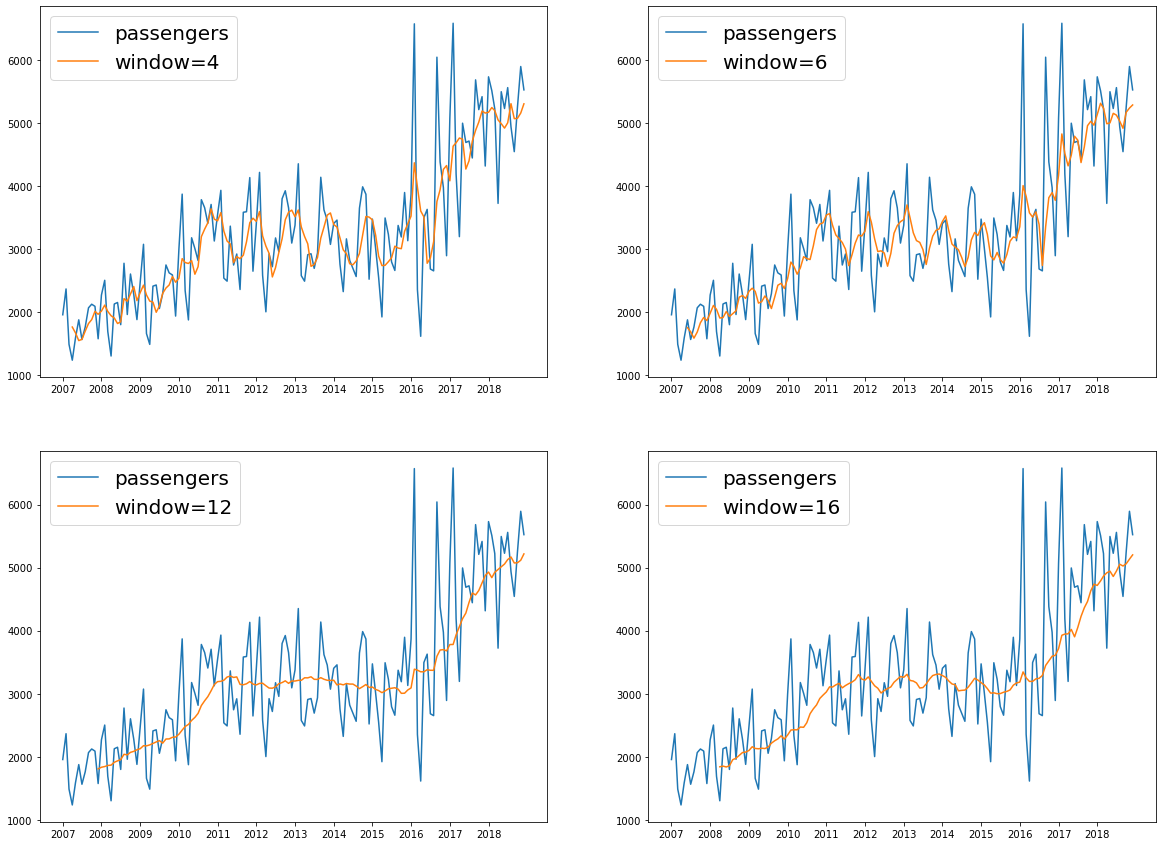

In [21]:
window = [4, 6, 12, 16] # количество месяцев для скользящего среднего
years = range(2007, 2020)
fig = plt.figure(figsize=(20, 15))

for n in range(1, 5):
    ax = fig.add_subplot(2, 2, n)
    ax.plot(passengers, label='passengers')
    ax.plot(passengers.rolling(window[n-1]).mean(), label=f'window={window[n-1]}')
    ax.legend(fontsize=20)
    ax.set_xticks(passengers.index[::12])
    ticks_loc = ax.get_xticks()
    ax.set_xticklabels([years[i] for i in range(len(ticks_loc))])

С окном 12 месяцев наблюдается возрастающий тренд

In [22]:
trend = passengers.rolling(12).mean()

## Сезонность

<AxesSubplot:xlabel='Month'>

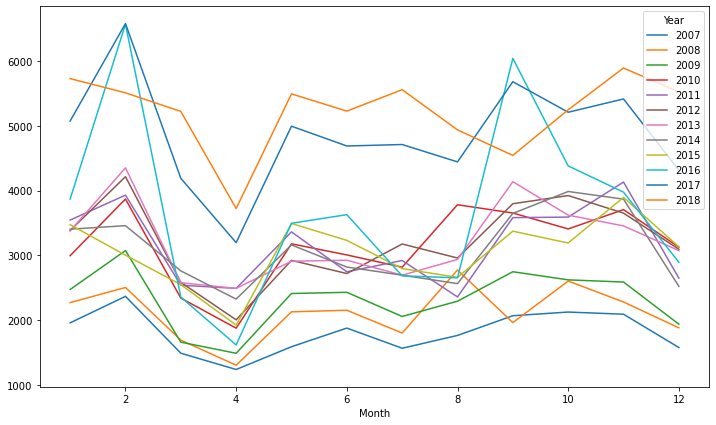

In [23]:
passengers_pivot = pd.pivot_table(df_train, values='Passengers', columns='Year', index='Month') 
passengers_pivot.plot()

В марте, апреле, июле и декабре происходит спад пассажиропотока, в феврале, мае возрастает. 

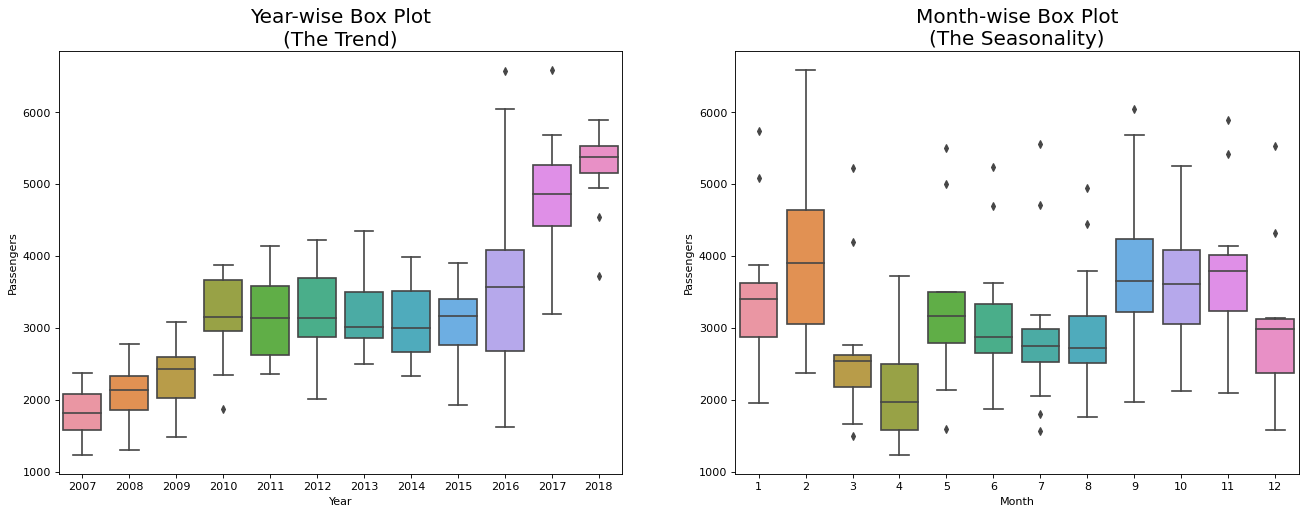

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Passengers', data=df_train, ax=axes[0])
sns.boxplot(x='Month', y='Passengers', data=df_train)

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Простой способ исправить сезонную составляющую - это использовать дифференцирование.

[Как идентифицировать и удалить сезонность из данных временных рядов с помощью Python](https://www.machinelearningmastery.ru/time-series-seasonality-with-python/)

<AxesSubplot:xlabel='Date'>

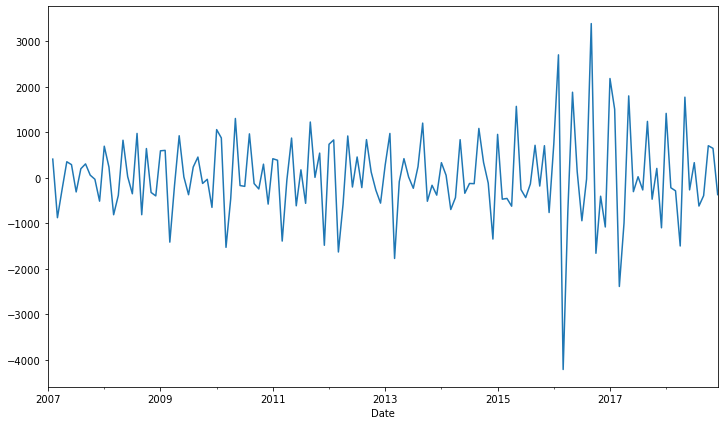

In [25]:
passengers.diff().plot()

## Декомпозия временного ряда

[Как разложить данные временных рядов на тренды и сезонность](https://www.machinelearningmastery.ru/decompose-time-series-data-trend-seasonality/)

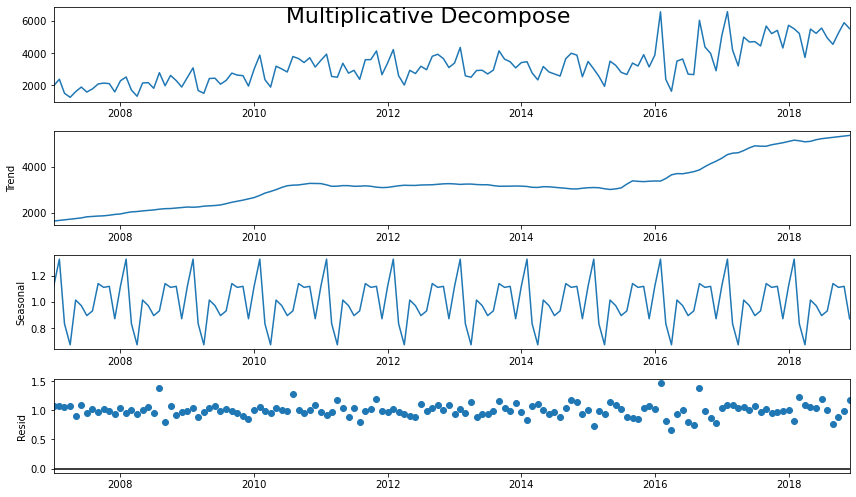

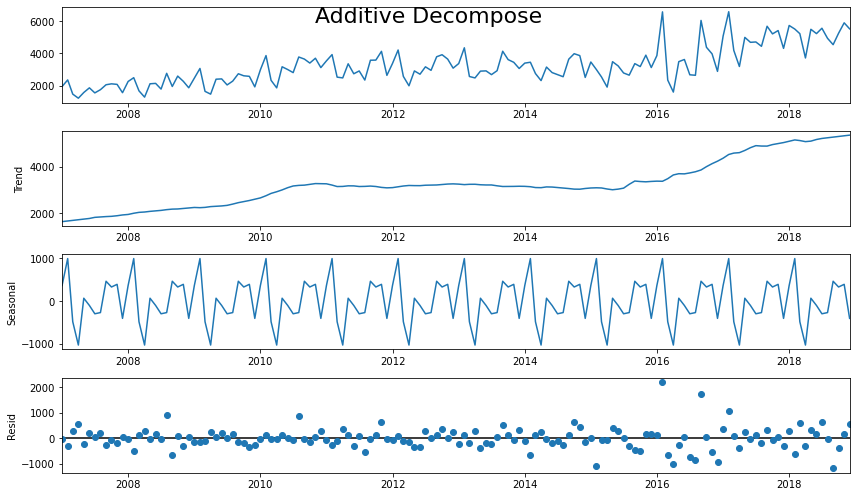

In [26]:
period = 12
result_mul = seasonal_decompose(df_train[['Passengers']],\
                                       model='multiplicative', extrapolate_trend='freq', period=period)
result_add = seasonal_decompose(df_train[['Passengers']],\
                                       model='additive', extrapolate_trend='freq', period=period)

result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## Проверка стационарности временного ряда

In [27]:
def test_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print('Ряд стационарный')
    else:
        print('Ряд нестационарный')
test_stationarity(passengers)

p-value: 0.9922687645853268
Ряд нестационарный


Уберем тренд из ряда

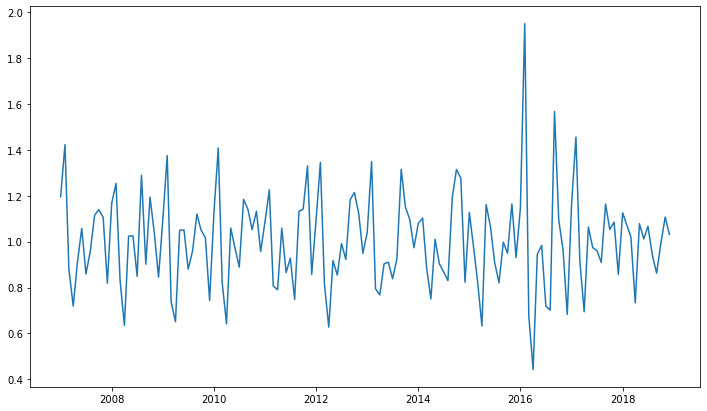

In [28]:
detrend = passengers / result_mul.trend
plt.plot(detrend)

In [29]:
test_stationarity(detrend)

p-value: 2.7289459171076784e-09
Ряд стационарный


Уберем тренд и сезонность из ряда

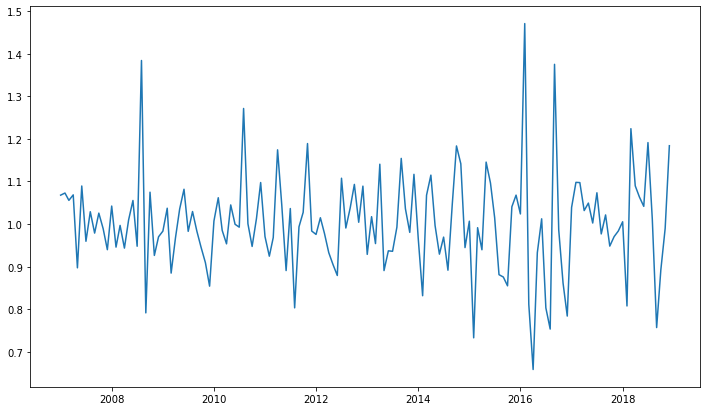

In [30]:
deseason_detrend = passengers / result_mul.trend / result_mul.seasonal
plt.plot(deseason_detrend)

In [31]:
test_stationarity(deseason_detrend)

p-value: 2.6858729470602815e-12
Ряд стационарный


Продифференцируем 1 раз

<AxesSubplot:xlabel='Date'>

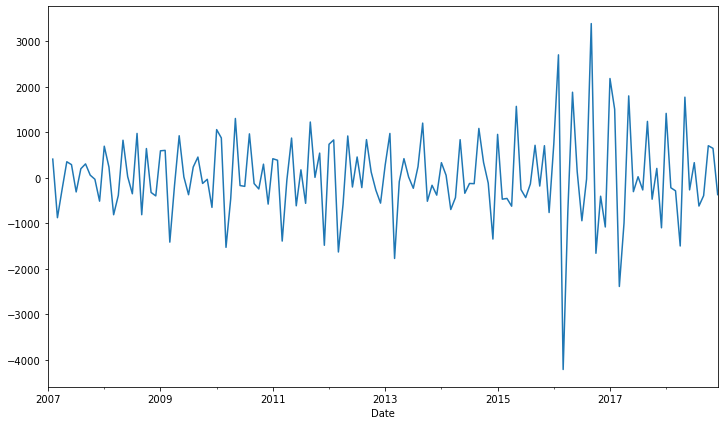

In [32]:
passengers.diff().plot()

In [33]:
test_stationarity(passengers.diff().dropna())

p-value: 3.7795690133598025e-14
Ряд стационарный


Продифференцируем 2 раза

<AxesSubplot:xlabel='Date'>

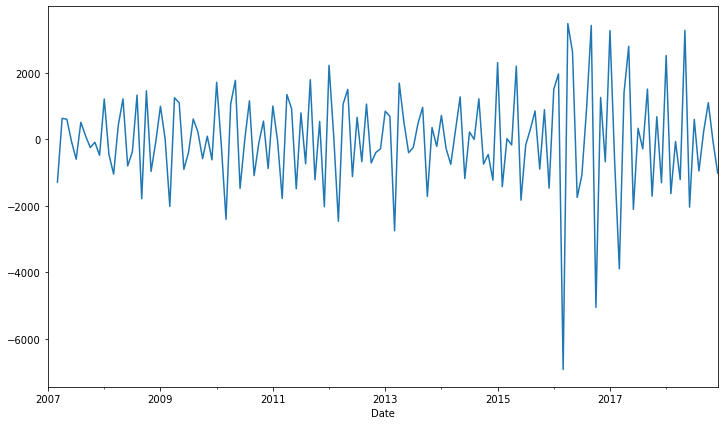

In [34]:
passengers.diff().diff().plot()

In [35]:
test_stationarity(passengers.diff().diff().dropna())

p-value: 2.6971393148035477e-12
Ряд стационарный


## Автокорреляция ACF

Изначальные графики

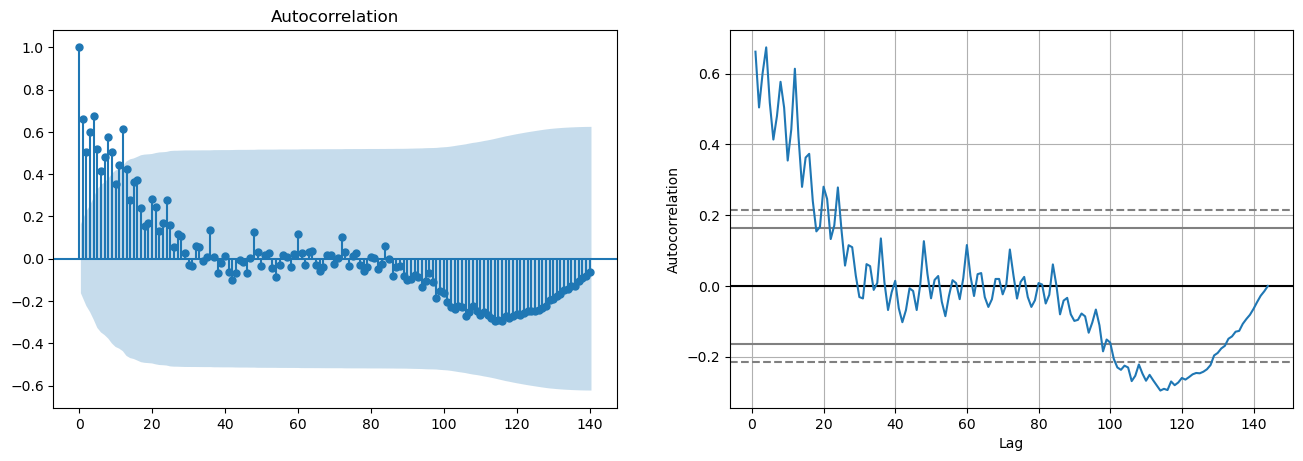

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
plot_acf(passengers, lags=140, ax=axes[0])
pd.plotting.autocorrelation_plot(passengers, ax=axes[1])
plt.show()

Убрали тренд

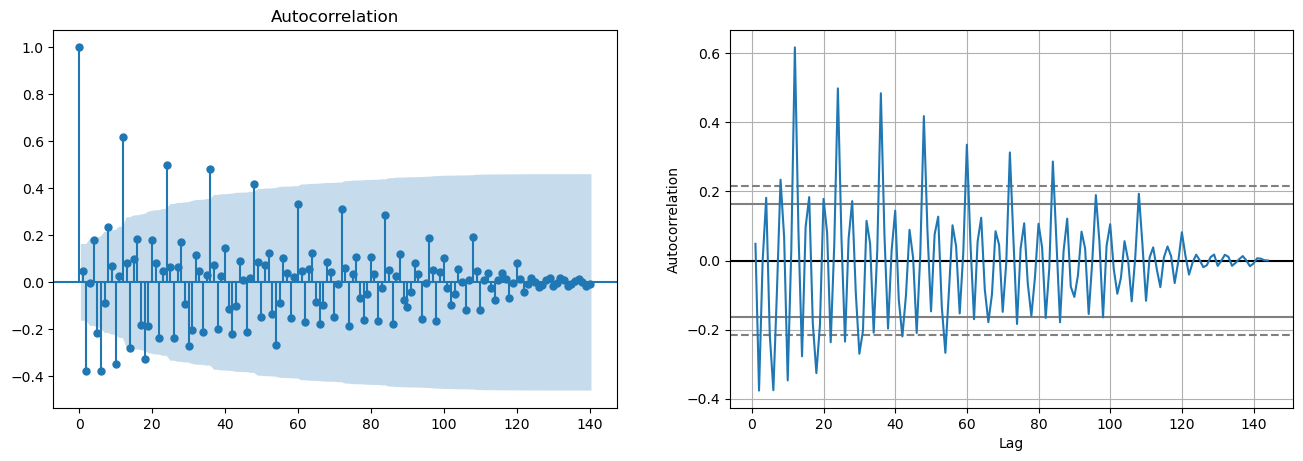

In [37]:
fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
plot_acf(detrend, lags=140, ax=axes[0])
pd.plotting.autocorrelation_plot(detrend, ax=axes[1])
plt.show()

Убрали тренд и сезонность

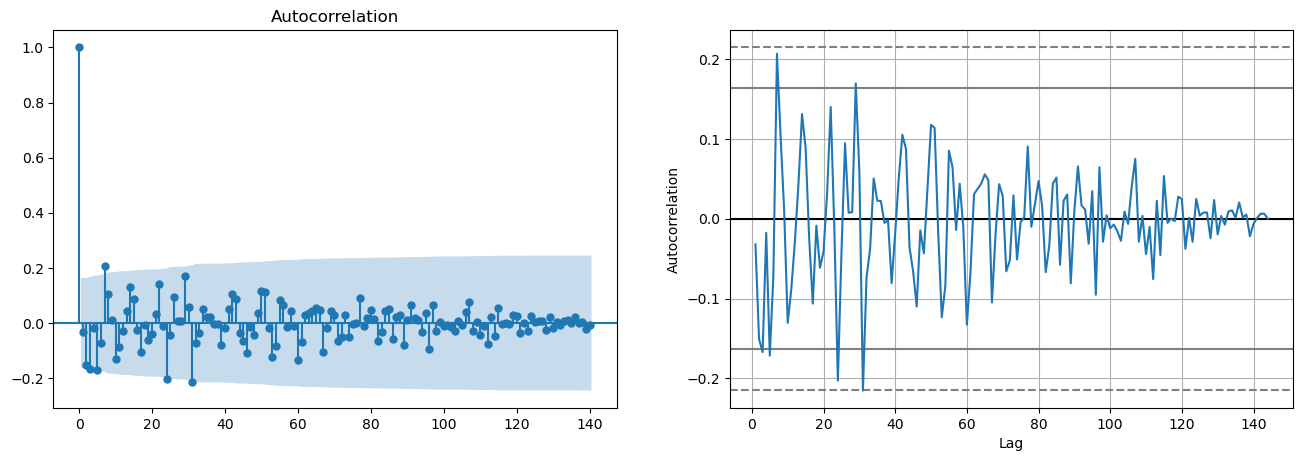

In [38]:
fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
plot_acf(deseason_detrend, lags=140, ax=axes[0])
pd.plotting.autocorrelation_plot(deseason_detrend, ax=axes[1])
plt.show()

Продифференцировали 1 раз

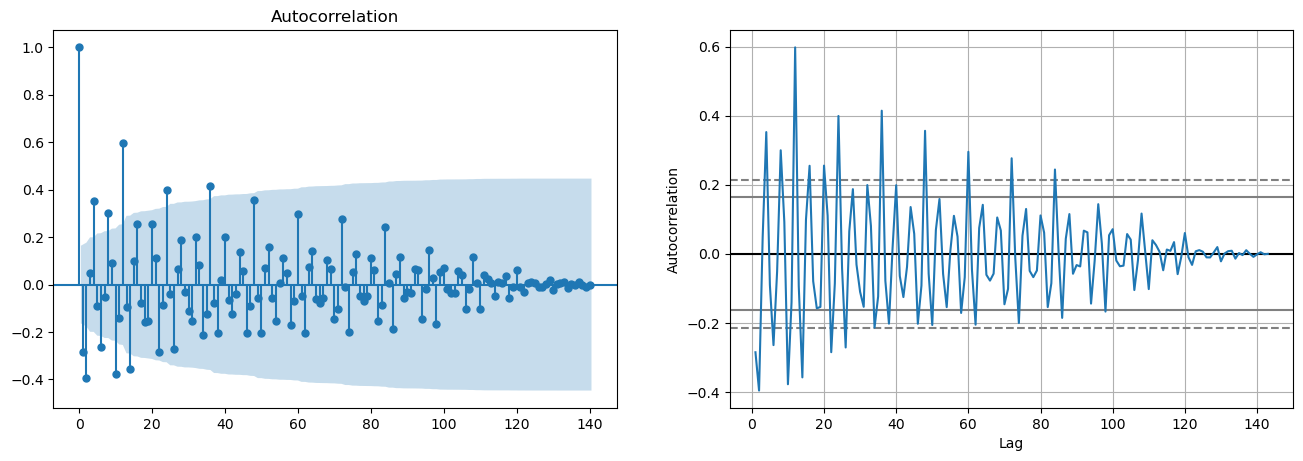

In [39]:
fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
plot_acf(passengers.diff().dropna(), lags=140, ax=axes[0])
pd.plotting.autocorrelation_plot(passengers.diff().dropna(), ax=axes[1])
plt.show()

## PACF

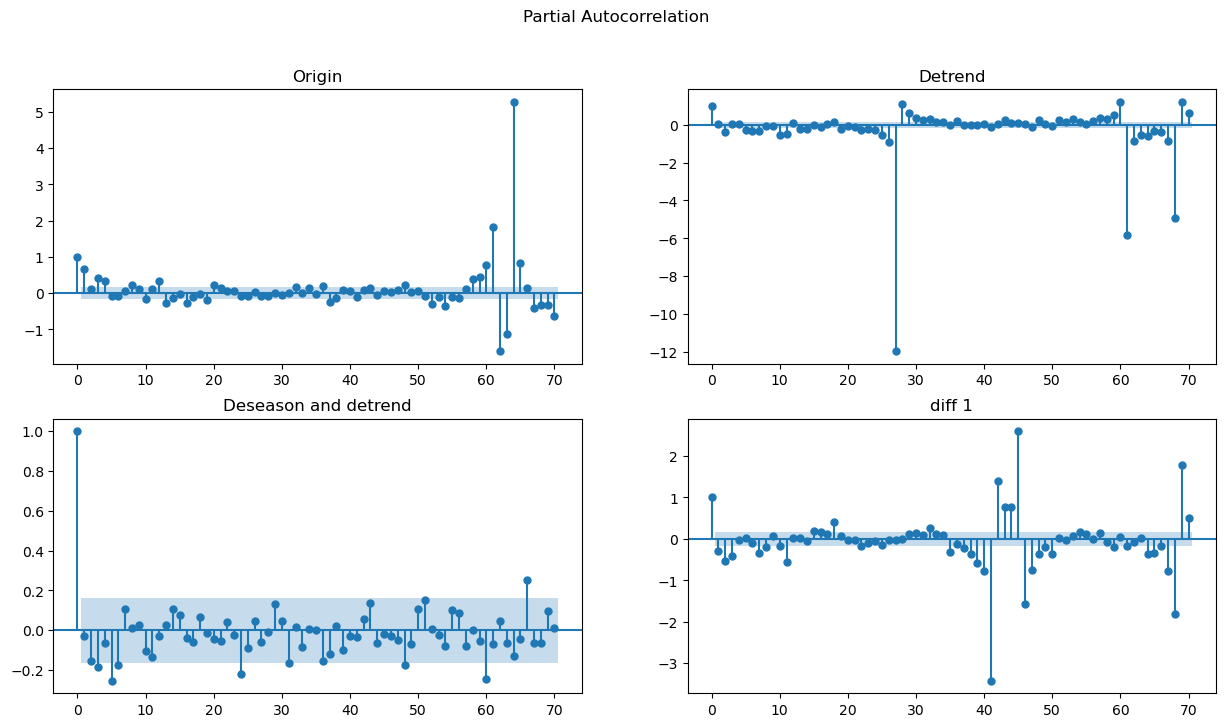

In [40]:
fig, axes = plt.subplots(2,2,figsize=(15,8), dpi= 100)
fig.suptitle('Partial Autocorrelation')
plot_pacf(passengers, lags=70, ax=axes[0, 0])
plot_pacf(detrend, lags=70, ax=axes[0, 1])
plot_pacf(deseason_detrend, lags=70, ax=axes[1, 0])
plot_pacf(passengers.diff().dropna(), lags=70, ax=axes[1, 1])
axes[0, 0].set_title('Origin')
axes[0, 1].set_title('Detrend')
axes[1, 0].set_title('Deseason and detrend')
axes[1, 1].set_title('diff 1')
plt.show()

## Lag Plots

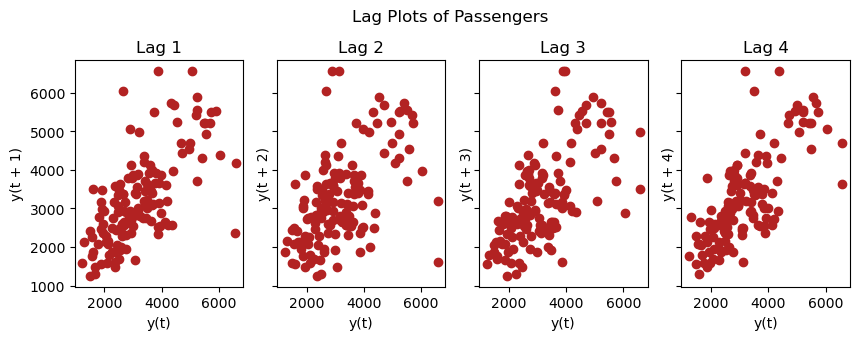

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    pd.plotting.lag_plot(passengers, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Passengers', y=1.05)    
plt.show()

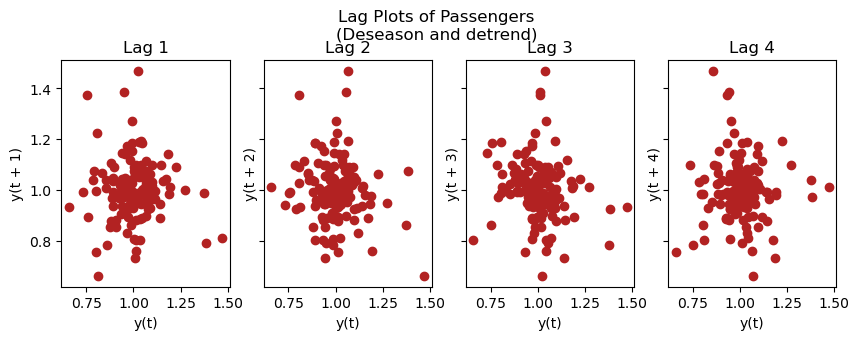

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    pd.plotting.lag_plot(deseason_detrend, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Passengers\n(Deseason and detrend)', y=1.05)    
plt.show()

# 3. Прогнозирование

## ARIMA

[ARIMA Model – Complete Guide to Time Series Forecasting in Python](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

In [43]:
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima.utils import ndiffs

### Определение коэффициентов p, d, q

In [44]:
d=1 # порядок диффиренцирования для получения стационарного ряда

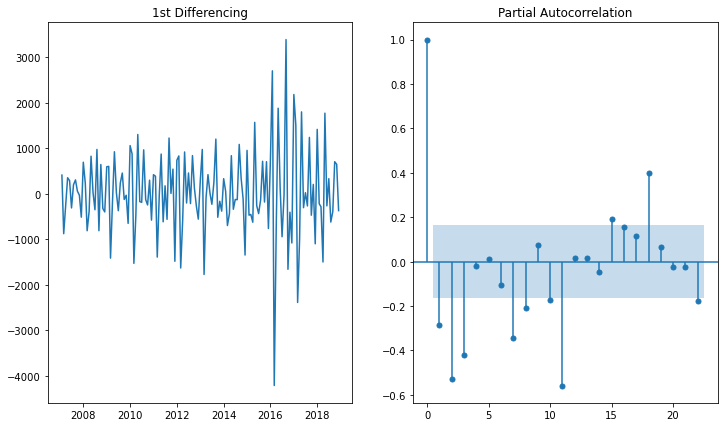

In [45]:
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(passengers.diff())
axes[0].set_title('1st Differencing')
plot_pacf(passengers.diff().dropna(), ax=axes[1])
plt.show()

In [46]:
p=3 # количество точек от начала, выходящие за пределы синей области на PACF

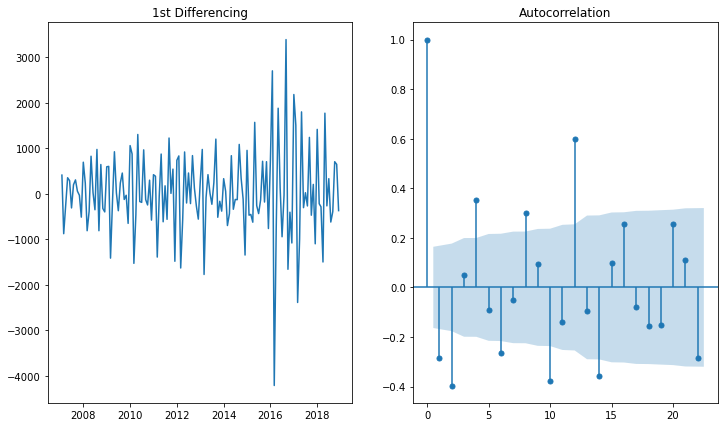

In [47]:
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(passengers.diff()); axes[0].set_title('1st Differencing')
plot_acf(passengers.diff().dropna(), ax=axes[1])

plt.show()

In [48]:
q=2 # количество точек от начала, выходящие за пределы синей области на ACF

In [49]:
# model = ARIMA(passengers, order=(3,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

## SARIMA

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
train = passengers

In [52]:
d = 1
D = 0
s = 12 # сезонность 12 месяцев

ps = range(0,2)
d = 1
qs = range(0,2)
Ps = range(0,2)
D = 0
Qs = range(0,2)

In [53]:
from itertools import product

parametrs = product(ps, qs, Ps, Qs)
parametrs_list = list(parametrs)
len(parametrs_list)

16

In [54]:
parametrs_list[:10]

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1)]

In [55]:
%%time
results = []
best_aic = float('inf')

for param in parametrs_list:
    #try except нужен, потому что нa нeкomopыx нaбopax napanempoв модель He обучается
    try:
        model = SARIMAX(train, order=(param[0], d, param[1]),
                                      seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
#Выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong paraneters:', param)
        continue
    aic = model.aic
    #Сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
        
    results.append([param, model.aic])

Wall time: 11.4 s


In [56]:
print(best_model.summary().tables[0])
print(best_model.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1109.928
Date:                            Wed, 20 Oct 2021   AIC                           2227.857
Time:                                    13:33:19   BIC                           2239.708
Sample:                                01-01-2007   HQIC                          2232.672
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7958      0.046    -17.442      0.000      -0.885      -0.706
ar.S.L12       0.9992      0.003   

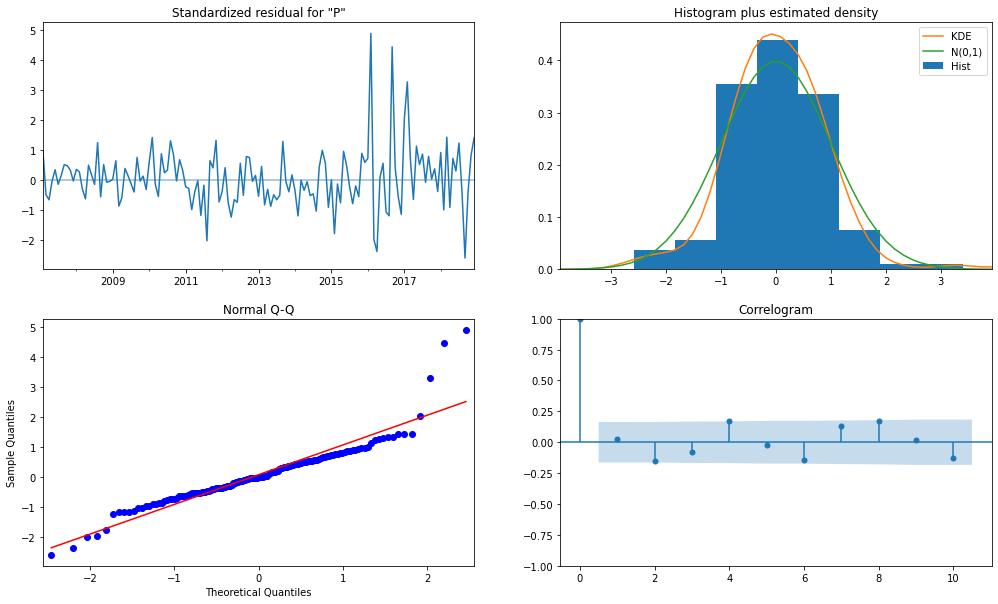

In [57]:
best_model.plot_diagnostics(figsize=(17,10))
plt.show()

In [58]:
stat_test = adfuller(best_model.resid[:])
print('adf: ', stat_test[0] )
print('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0] > stat_test[4]['5%']:
    print ('Есть единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')

adf:  -9.974980680136683
p-value:  2.189694366640605e-17
Critical values:  {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}
Единичных корней нет, ряд стационарен


[Предсказания](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html)

In [59]:
pred = best_model.forecast(steps=12)

In [60]:
# соединение тренировочных данных и предсказанных
# connect = pd.Series(index=[train.index[-1], pred.index[0]], data=[train[-1], pred[0]])

In [61]:
test_pred = best_model.predict(start=pd.to_datetime("2007-01-01"), end=pd.to_datetime("2018-12-01"))

Доверительные интервалы

In [62]:
pr = best_model.get_prediction(start=pd.to_datetime("2019-01-01"),end=pd.to_datetime("2019-12-01"))
pred_ci = pr.conf_int()
pred_ci.head(2)

,lower Passengers,upper Passengers
2019-01-01,4701.597932,6782.934711
2019-02-01,5298.473199,7422.689148


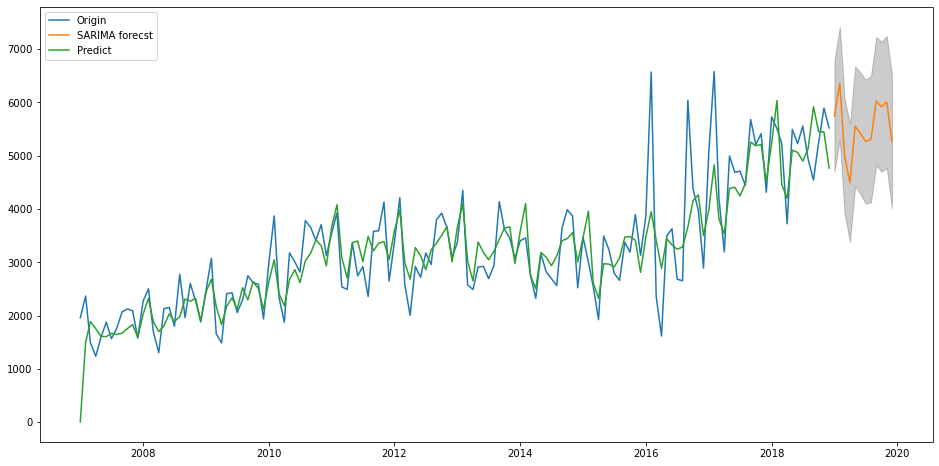

In [63]:
plt.figure(figsize=(16,8))
plt.plot(train, label='Origin')
plt.plot(pred, label='SARIMA forecst')
# plt.plot(connect)
plt.plot(test_pred, label='Predict')
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend(loc='upper left')
plt.show()

In [64]:
error = ((train - test_pred).abs() / train).mean() * 100
print('Ошибка: {:.1f}%'.format(error))

Ошибка: 13.1%


### Сохранение результатов

In [65]:
import json

np.savetxt('res_airport.csv', pred.values, fmt='%d')

ans = {"answer": list(pred)}
with open("res_airport_json.json", "w") as write_file:
    json.dump(ans, write_file)